In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from enum import Enum

In [28]:
assert sys.version != "3.11.5" , "wrong python version"

In [29]:
dataset = pd.read_csv("dataset\student_habits_performance.csv",index_col="student_id")
dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4


<Axes: xlabel='age'>

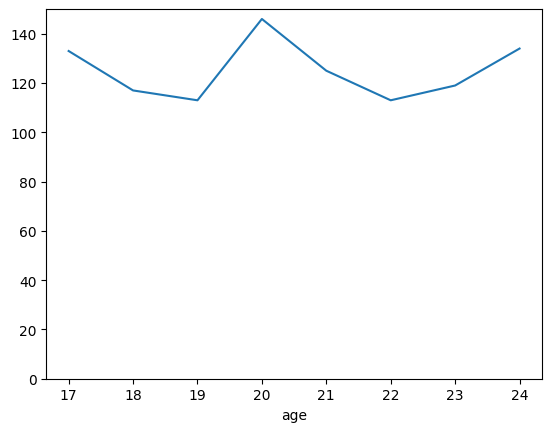

In [30]:
# pour l'age on aimerais avoir le nombre de personne de chaque age
dataset.groupby("age").size().plot(ylim=(0,150))

In [31]:
# repartition par genre
dataset.groupby("gender").size().to_frame('Number')

,Number
gender,
Female,481
Male,477
Other,42


<Axes: xlabel='exam_score'>

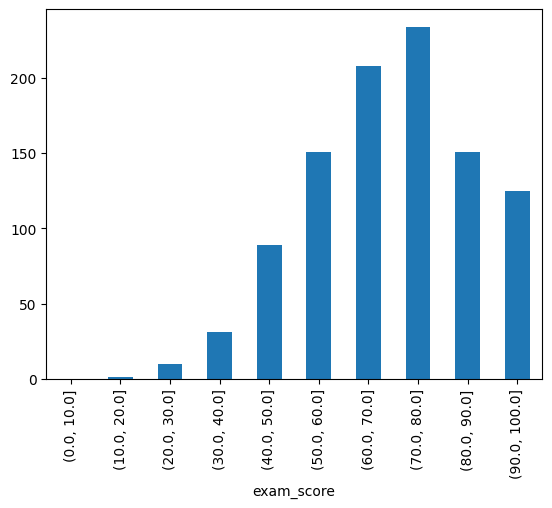

In [32]:
# on veut avoir la répartition des résultats par tranches de 10 de score
pd.cut(dataset["exam_score"],[0,10,20,30,40,50,60,70,80,90,100.0]).value_counts().sort_index().plot(kind="bar")

In [33]:
# On peut ainsi déterminer la moyenne, la médiane et l'écart-type des résultats
moyenne = dataset["exam_score"].mean()
mediane = dataset["exam_score"].median()
ecart_type = dataset["exam_score"].std()
print("moyenne : ",moyenne, ", médiane : ",mediane, " écart-type : ",ecart_type)

moyenne :  69.6015 , médiane :  70.5  écart-type :  16.888563921818257


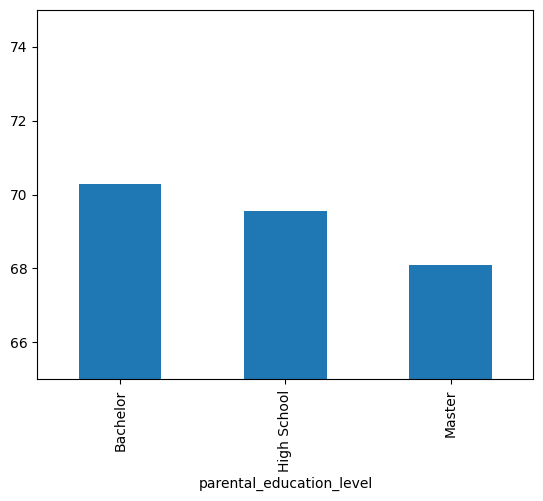

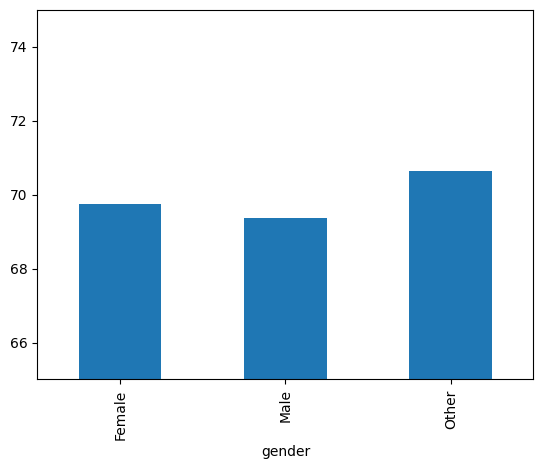

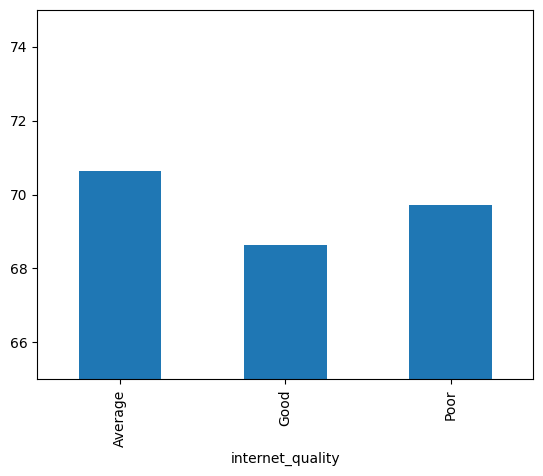

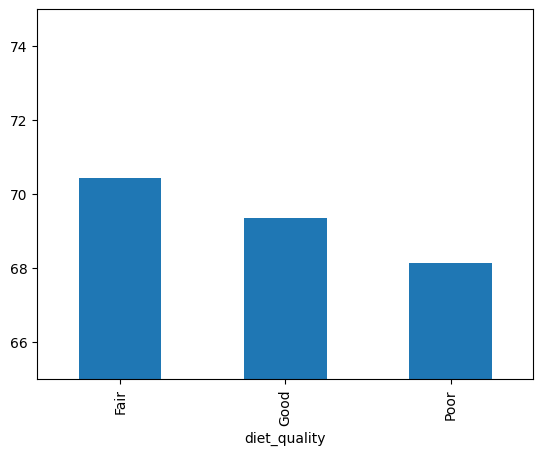

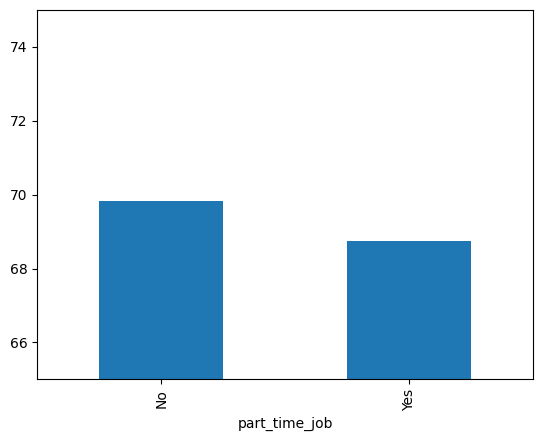

In [34]:
YLIM = (65,75)

dataset.groupby("parental_education_level")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("gender")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("internet_quality")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("diet_quality")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("part_time_job")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()

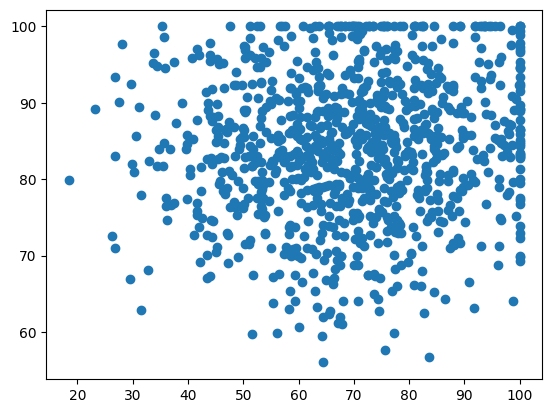

attendance


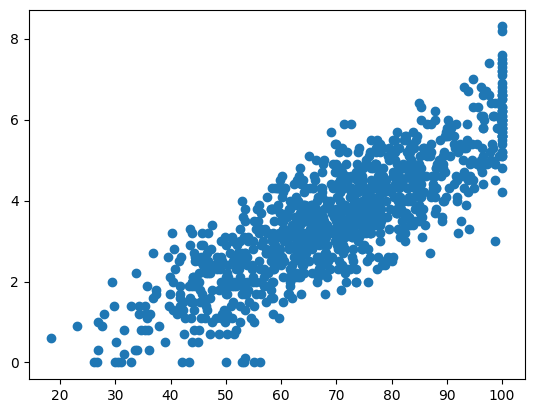

study hours


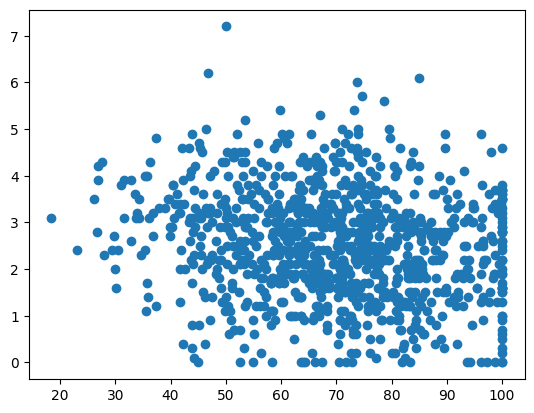

social media hours


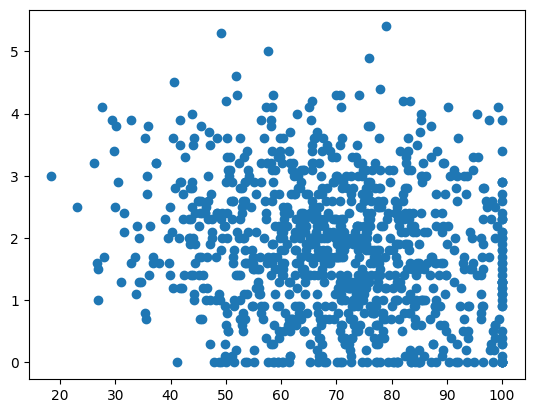

netflix hours


In [35]:
plt.scatter(dataset["exam_score"],dataset["attendance_percentage"])
plt.show()
print("attendance")
plt.scatter(dataset["exam_score"],dataset["study_hours_per_day"])
plt.show()
print("study hours")
plt.scatter(dataset["exam_score"],dataset["social_media_hours"])
plt.show()
print("social media hours")
plt.scatter(dataset["exam_score"],dataset["netflix_hours"])
plt.show()
print("netflix hours")

On arrange maintenant le dataset pour remplacer les string par des int

In [36]:
gender_map = {"Female":0,"Male":1,"Other":2}
job_map = {"No":0,"Yes":1}
diet_map  ={"Poor":0,"Fair":1,"Good":2}
parentlevel_map = {"NaN":0,"Bachelor":1,"High School":2,"Master":3}
extraactivity_map = {"No":0,"Yes":1}
internet_map = {"Poor":0,"Average":1,"Good":2}

In [37]:
dataset["gender"] = dataset["gender"].map(gender_map)
dataset["part_time_job"] = dataset["part_time_job"].map(job_map)
dataset["diet_quality"] = dataset["diet_quality"].map(diet_map)
dataset["parental_education_level"] = dataset["parental_education_level"].map(parentlevel_map)
dataset["extracurricular_participation"] = dataset["extracurricular_participation"].map(extraactivity_map)
dataset["internet_quality"] = dataset["internet_quality"].map(internet_map)

dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,1,6,3.0,1,8,1,56.2
S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,2,6,2.0,1,8,0,100.0
S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,0,1,2.0,0,1,0,34.3
S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,0,4,3.0,2,1,1,26.8
S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,1,3,3.0,2,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,1,2,2.0,2,6,1,76.1
S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,0,1,2.0,1,6,1,65.9
S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,2,5,1.0,2,9,1,64.4


<Axes: >

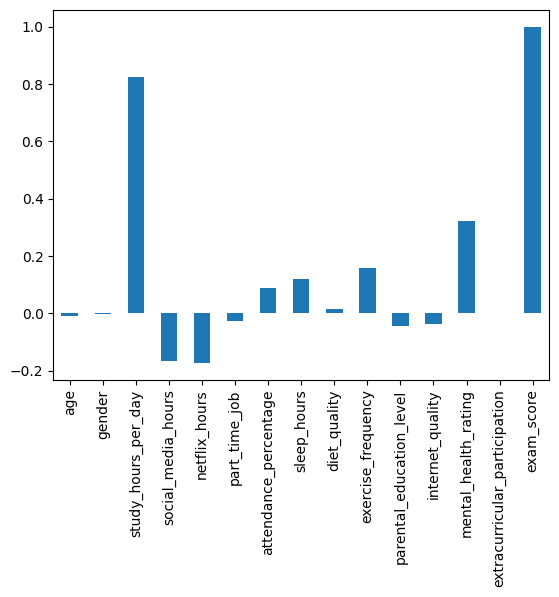

In [38]:
# correlation matrix
dataset.corr()["exam_score"].plot(kind="bar")

In [ ]:
for key in dataset.keys():
    dataset[key]=(dataset[key]-dataset[key].min())/(dataset[key].max()-dataset[key].min())

dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,0.857143,0.0,0.000000,0.166667,0.203704,0,0.659091,0.705882,0.5,1.000000,1.0,0.5,0.777778,1.0,0.463235
S1001,0.428571,0.0,0.831325,0.388889,0.425926,0,0.938636,0.205882,1.0,1.000000,0.5,0.5,0.777778,0.0,1.000000
S1002,0.571429,0.5,0.168675,0.430556,0.240741,0,0.881818,0.705882,0.0,0.166667,0.5,0.0,0.000000,0.0,0.194853
S1003,0.857143,0.0,0.120482,0.541667,0.185185,0,0.340909,0.882353,0.0,0.666667,1.0,1.0,0.000000,1.0,0.102941
S1004,0.285714,0.0,0.602410,0.611111,0.092593,0,0.793182,0.250000,0.5,0.500000,1.0,1.0,0.000000,0.0,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,0.571429,0.0,0.313253,0.069444,0.296296,0,0.477273,0.632353,0.5,0.333333,0.5,1.0,0.555556,1.0,0.707108
S1996,0.000000,0.0,0.349398,0.138889,0.444444,1,0.681818,0.529412,0.0,0.166667,0.5,0.5,0.555556,1.0,0.582108
S1997,0.428571,0.5,0.361446,0.361111,0.240741,0,0.134091,0.485294,1.0,0.833333,0.0,1.0,0.888889,1.0,0.563725


In [40]:
print(dataset.isna().sum())
dataset.dropna(inplace=True)
print(dataset.isna().sum())

age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating       

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend as K

In [57]:
# load the dataset
tensor_dataset = tf.convert_to_tensor(dataset)
# split into input (X) and output (y) variables
X = np.asarray(tensor_dataset[:,0:14])
#print(type(X))
#print(X)
Y = np.asarray(tensor_dataset[:,14:15])
print(X)
print(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=0)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

[[0.85714286 0.         0.         ... 0.5        0.77777778 1.        ]
 [0.42857143 0.         0.8313253  ... 0.5        0.77777778 0.        ]
 [0.57142857 0.5        0.1686747  ... 0.         0.         0.        ]
 ...
 [0.42857143 0.5        0.36144578 ... 1.         0.88888889 1.        ]
 [1.         0.5        0.65060241 ... 0.5        0.         0.        ]
 [0.28571429 0.         0.51807229 ... 0.5        0.77777778 0.        ]]
[[0.46323529]
 [1.        ]
 [0.19485294]
 [0.10294118]
 [0.58823529]
 [1.        ]
 [0.875     ]
 [0.66421569]
 [0.74142157]
 [1.        ]
 [0.68627451]
 [0.71691176]
 [0.70343137]
 [0.74142157]
 [0.68137255]
 [0.45098039]
 [0.64215686]
 [0.3125    ]
 [0.32965686]
 [0.49142157]
 [0.78553922]
 [0.98406863]
 [0.31004902]
 [0.44730392]
 [0.63112745]
 [0.6752451 ]
 [0.64583333]
 [0.78921569]
 [0.70220588]
 [0.63970588]
 [0.40318627]
 [0.4129902 ]
 [0.40196078]
 [0.66421569]
 [0.64093137]
 [0.50245098]
 [0.48651961]
 [0.78308824]
 [0.62867647]
 [0.583333

In [58]:
print("X_train min/max:", np.min(X_train), np.max(X_train))
print("y_train min/max:", np.min(y_train), np.max(y_train))

print("Any NaN in X_train?", np.isnan(X_train).any())
print("Any NaN in y_train?", np.isnan(y_train).any())

X_train min/max: 0.0 1.0
y_train min/max: 0.0 1.0
Any NaN in X_train? False
Any NaN in y_train? False


In [88]:
N1 = 10
N2 = 20
N3 = 30
N4 = 1

epochs = 70 #2000 #3000

# define the model
model = Sequential()
model.add(Dense(N1, input_shape=(14,), activation='relu'))
model.add(Dense(N2, activation='relu'))
model.add(Dense(N3, activation='relu'))
model.add(Dense(1, activation=custom_activation))

# compile the model
model.compile(loss='mean_squared_error',optimizer='adam')

# fit the model on the dataset
model.fit(X_train, y_train, epochs=epochs, batch_size=20,validation_data=(X_test, y_test),)


Epoch 1/70


c:\Users\EnterN1me\Documents\INSA\Semestre 8\Electif - Machine Learning\Projet\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1462 - val_loss: 0.0411
Epoch 2/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0434 - val_loss: 0.0310
Epoch 3/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0293 - val_loss: 0.0223
Epoch 4/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 - val_loss: 0.0159
Epoch 5/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - val_loss: 0.0106
Epoch 6/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0075
Epoch 7/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_loss: 0.0088
Epoch 8/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 9/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 10/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 11/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 12/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0046


{'loss': [0.11023001372814178, 0.04172647371888161, 0.036240193992853165, 0.03265639767050743, 0.028939485549926758, 0.025432270020246506, 0.022094624117016792, 0.018336601555347443, 0.014458361081779003, 0.011348279193043709, 0.008930506184697151, 0.00738899502903223, 0.006391782313585281, 0.005867771338671446, 0.005686743184924126, 0.005127027165144682, 0.004918880295008421, 0.0048895240761339664, 0.0045805396512150764, 0.004469205159693956, 0.004423739854246378, 0.004330191761255264, 0.004283498972654343, 0.0048296344466507435, 0.004391389433294535, 0.004127254709601402, 0.004083761479705572, 0.0042322902008891106, 0.004224724601954222, 0.004034845624119043, 0.00405608955770731, 0.004097252618521452, 0.003997585270553827, 0.00394225399941206, 0.004001263529062271, 0.0038817080203443766, 0.00390591355971992, 0.003792536212131381, 0.003926376812160015, 0.0038649130146950483, 0.0038902920205146074, 0.0038783366326242685, 0.0037917057052254677, 0.004088735673576593, 0.003920028451830149

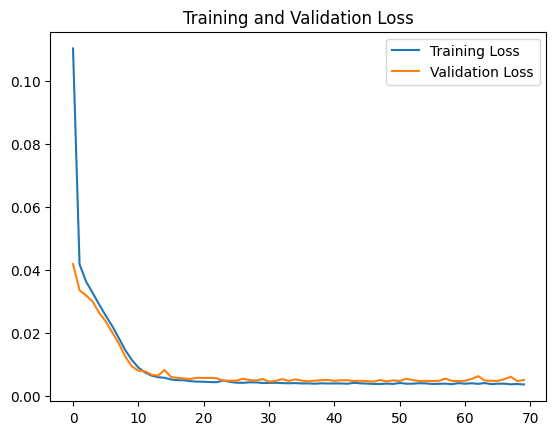

In [52]:
print(model.history.history)
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs_range = range(epochs)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


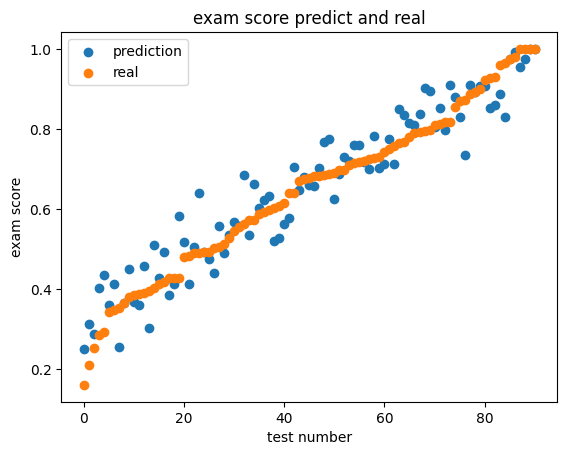

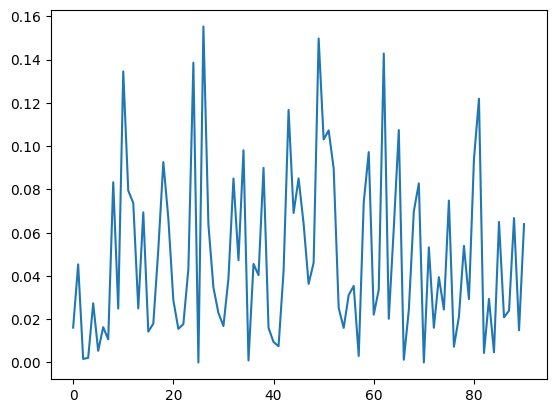

[[1.         0.         0.56626506 ... 1.         0.         0.        ]
 [0.14285714 0.         0.45783133 ... 0.5        0.77777778 0.        ]
 [0.         0.         0.62650602 ... 0.5        0.66666667 0.        ]
 ...
 [0.42857143 0.         0.63855422 ... 1.         0.55555556 0.        ]
 [0.71428571 0.         0.71084337 ... 1.         0.         1.        ]
 [0.42857143 0.         0.42168675 ... 1.         0.33333333 0.        ]]


In [97]:
### TEST
predictions = model.predict(X_test)
predictions = [val if val[0]<=1 else [1] for val in predictions]
predictions = predictions#.reshape(1,-1)

fig, ax = plt.subplots()
y_test_sort,predictions_sort = [val for val,_ in sorted(zip(y_test,predictions))], [val for _,val in sorted(zip(y_test,predictions))]
ax.scatter(range(len(predictions)),predictions_sort,label="prediction")
ax.scatter(range(len(y_test)),y_test_sort,label="real")
plt.xlabel("test number")
plt.ylabel("exam score")
plt.title("exam score predict and real")
ax.legend()
plt.show()
plt.plot(range(len(y_test)),abs(predictions-y_test),label="diff")
plt.show()
print(X_test)

In [54]:
model.summary()
print("weight :",model.get_weights())
predictions

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,095 (12.09 KB)

 Trainable params: 1,031 (4.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,064 (8.07 KB)

weight : [array([[ 0.4132217 ,  0.11663144, -0.20696484,  0.48976204,  0.38586897,
         0.280345  ,  0.2517078 , -0.24705935, -0.19851825, -0.17793302],
       [ 0.08210848, -0.16055007, -0.10828732, -0.16116293,  0.30173984,
        -0.26369965, -0.10011104, -0.04299419, -0.37352157, -0.13486032],
       [-0.50192994,  0.04725792,  0.15586261,  0.54347104,  0.73866767,
         0.43781924, -0.48001975,  0.6366278 ,  0.04366131,  0.35906237],
       [ 0.48104277, -0.05092787, -0.0735711 ,  0.04663808,  0.24155182,
        -0.04667646,  0.5277231 , -0.11353631, -0.36817634,  0.43340078],
       [-0.14919548, -0.1221873 ,  0.08349977, -0.02871321,  0.11032327,
        -0.08558936,  0.30290353, -0.06384312, -0.4465373 ,  0.02353611],
       [ 0.0400019 , -0.24454002,  0.07447898,  0.03915313, -0.15377465,
         0.32643774,  0.20121561,  0.1727296 , -0.20107901,  0.10485303],
       [ 0.31435487, -0.43042606, -0.5120025 ,  0.36935264,  0.28045407,
         0.01917269,  0.2264594 ,  

array([[0.58516467],
       [0.7203239 ],
       [0.9356773 ],
       [0.45887697],
       [0.66571766],
       [0.6208876 ],
       [0.35857892],
       [0.6795395 ],
       [0.7314535 ],
       [0.64529735],
       [0.7436804 ],
       [0.52700746],
       [0.89157075],
       [0.7974702 ],
       [0.39022577],
       [0.9482338 ],
       [0.78676254],
       [0.5079755 ],
       [0.88782084],
       [0.28445506],
       [0.3457746 ],
       [0.39359227],
       [0.31523016],
       [0.72315425],
       [0.7198956 ],
       [0.98002017],
       [0.5179295 ],
       [0.4060609 ],
       [0.22700492],
       [0.80155474],
       [0.38381118],
       [0.5283147 ],
       [0.7457721 ],
       [0.6676655 ],
       [0.85476685],
       [0.32776532],
       [0.7567027 ],
       [0.8375095 ],
       [0.6371121 ],
       [0.3678497 ],
       [0.66938365],
       [0.84535503],
       [0.38482916],
       [0.36510816],
       [0.3915862 ],
       [0.74771327],
       [0.615135  ],
       [0.476

In [ ]:
model.predict(np.asarray([[
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[1.0272591]], dtype=float32)

normaliser toute les catégorie